In [19]:
import pygad
import numpy as np
import gym
import matplotlib.pyplot as plt
import time

In [20]:
env = gym.make("FrozenLake8x8-v1", render_mode="rgb_array", is_slippery=False)
env.reset(seed=42)

def fitness_func(solution, sol_idx):
    global env
    env.reset(seed=42)

    position = (0,0)
    # 0 is left, 1 is down, 2 is right, 3 is up
    steps = [(0,-1), (1, 0), (0, 1), (-1, 0)]
    max_distance = 0
    visited = set()
    fitness = 0

    for i in range(len(solution)):
        action = solution[i]
        new_position = (position[0] + steps[action][0], position[1] + steps[action][1])
        # If on board
        if new_position[0] < 0 or new_position[0] > 7 or new_position[1] < 0 or new_position[1] > 7:
            fitness -= 1
            continue
        # Hole
        if env.desc[new_position[0], new_position[1]] == b'H':
            fitness -= 1
            break
        # Present
        if env.desc[new_position[0], new_position[1]] == b'G':
            fitness += 25
            break
        # Minus fitness for place we've been in
        if new_position in visited:
            fitness -= 2
            continue
        visited.add(new_position)
        position = new_position
    return fitness

In [21]:
fitness_function = fitness_func
num_generations = 500
num_parents_mating = 25
sol_per_pop = 100
num_genes = 25
gene_space = [0, 1, 2, 3]
gene_type = int
init_range_low = 0
init_range_high = 3
parent_selection_type = "sss"
keep_parents = 13
crossover_type = "single_point"
mutation_type = "adaptive"
mutation_probability = (0.25, 0.15)

last_fitness = 0

In [22]:
ga_instance = pygad.GA(num_generations=num_generations,
                          num_parents_mating=num_parents_mating,
                            fitness_func=fitness_function,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            gene_type=gene_type,
                            init_range_low=init_range_low,
                            init_range_high=init_range_high,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            crossover_type=crossover_type,
                            mutation_type=mutation_type,
                            mutation_probability=mutation_probability,
                            )

ga_instance.run()

Best solution genes: [2 2 2 2 2 1 2 2 1 1 1 1 1 1 3 2 3 0 3 2 0 1 1 2 3]
Value of the best solution = 25


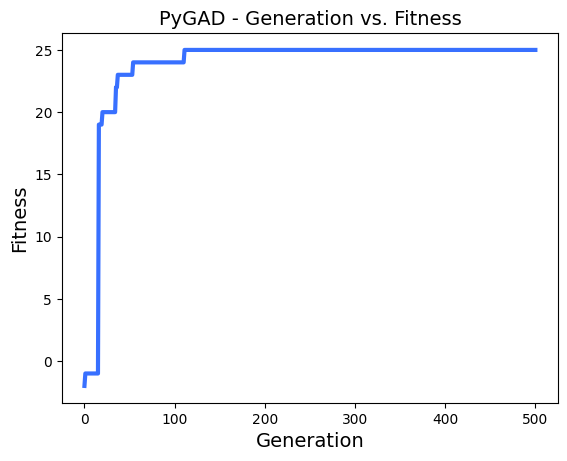

In [23]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best solution genes: {solution}".format(solution=solution))
print("Value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

plt.show()

In [25]:
env = gym.make("FrozenLake8x8-v1", render_mode="human", is_slippery=False)
env.reset(seed=42)

for i in range(len(solution)):
    action = solution[i]
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset(seed=42)
        break
env.close()
print(solution)


[2 2 2 2 2 1 2 2 1 1 1 1 1 1 3 2 3 0 3 2 0 1 1 2 3]
